How to Forecast the Canadian Crude Oil Production with Facebook’s Prophet library in Python?

The Prophet library is designed for making forecasts for univariate time series datasets. In this post, we will show how to utilize the Prophet library to forecast the Canadian crude oil production until 2025.

Why Canadian Crude Oil Production Data?

Over the next two decades, the global population is expected to grow by nearly two billion while the global middle class is expected to nearly double. Countries will be more urbanized and industrialized, and will consume more energy than today. Canada thus has a significant role to play in meeting the global crude oil demand. The country is currently the world’s sixth largest oil producer and has an opportunity to gain global market share, replacing less sustainably produced oil sources. Therefore, it is important to forecast Canadian crude oil production.

Importing Data and Libraries

Now, let's start by importing various libraries in Python such as fbprophet, numpy, pandas and matplotlib. We will also utilize the “`%matplotlib inline“` instruction to view the charts that are created during the session. 

In [49]:
from fbprophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import plotly as py
warnings.filterwarnings("ignore")

Next, we will import Canadian crude oil production data from Canada Energy regulator website, load that data into a pandas dataframe 'df'.

In [50]:
df = pd.read_excel("Canada Crude Oil Production.xlsx")
# Check the first 5 elements of the dataframe
df.head()

,Month,Canada Total
0,2000-01-01,2.146907e+06
1,2000-02-01,2.160835e+06
2,2000-03-01,2.080255e+06
3,2000-04-01,2.139488e+06
4,2000-05-01,2.185353e+06


In [51]:
# Check if the the data is set up in proper format and then start modeling/forecasting. 
df.dtypes

Month           datetime64[ns]
Canada Total           float64
dtype: object

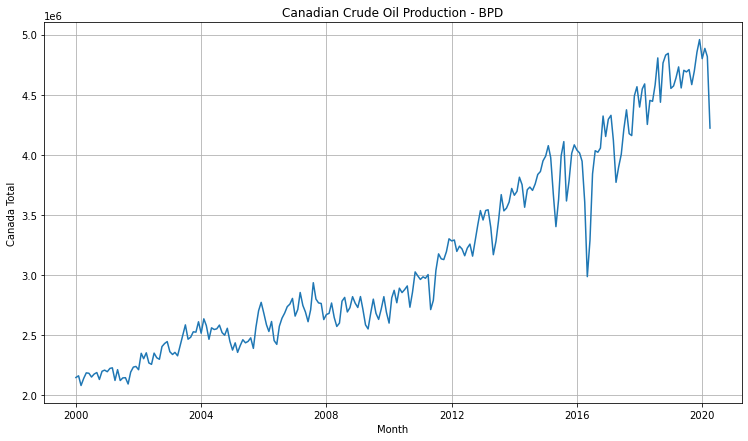

In [70]:
#Visualize the dataframe i.e. Canadian total production in BPD 
plt.figure(figsize=(12.5,7))
sns.lineplot(data=df, x="Month", y="Canada Total")
plt.title("Canadian Crude Oil Production - BPD")
plt.grid(True)
plt.show()

Prophet expects that the format of the dataframe to be specific. The model expects a ‘ds’ column  that contains the datetime field and and a ‘y’ column that contains the value we are wanting to model/forecast.

In [22]:
df.columns = ["ds","y"]

model = Prophet()
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Now its time to start forecasting. With Prophet, we start by building some future time data with the following command:

In [23]:
future = model.make_future_dataframe(periods= 60, freq='m')

In this line of code, we created a pandas dataframe with 60 (periods = 60) future data points with a monthly frequency (freq = ‘m’). In the next line of code, we check the last five dates of the forecasted data.

In [24]:
future.tail()

,ds
299,2024-11-30
300,2024-12-31
301,2025-01-31
302,2025-02-28
303,2025-03-31


Now, we will try to predict the actual values using Prophet library and check the last five elements of the forecast.

In [25]:
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
299,2024-11-30,5.801679e+06,5.781706e+06,6.148327e+06,5.729613e+06,5.870835e+06,160285.088511,160285.088511,160285.088511,160285.088511,160285.088511,160285.088511,0.0,0.0,0.0,5.961964e+06
300,2024-12-31,5.819536e+06,5.678551e+06,6.040396e+06,5.745314e+06,5.890830e+06,36231.306169,36231.306169,36231.306169,36231.306169,36231.306169,36231.306169,0.0,0.0,0.0,5.855768e+06
301,2025-01-31,5.837394e+06,5.681447e+06,6.039559e+06,5.761432e+06,5.910743e+06,25374.181883,25374.181883,25374.181883,25374.181883,25374.181883,25374.181883,0.0,0.0,0.0,5.862768e+06
302,2025-02-28,5.853523e+06,5.699996e+06,6.060069e+06,5.775064e+06,5.928746e+06,29071.618707,29071.618707,29071.618707,29071.618707,29071.618707,29071.618707,0.0,0.0,0.0,5.882595e+06
303,2025-03-31,5.871380e+06,5.710151e+06,6.100752e+06,5.790661e+06,5.948637e+06,29500.131652,29500.131652,29500.131652,29500.131652,29500.131652,29500.131652,0.0,0.0,0.0,5.900881e+06


If we take a look at the data using .tail(), we notice there are a bunch of columns in the forecast dataframe. The important ones (for now) are ‘ds’ (datetime), ‘yhat’ (forecast), ‘yhat_lower’ and ‘yhat_upper’ (uncertainty levels).

In [26]:
forecast[["ds","yhat","yhat_lower","yhat_upper"]].head()

,ds,yhat,yhat_lower,yhat_upper
0,2000-01-01,2.156749e+06,1.983430e+06,2.322900e+06
1,2000-02-01,2.173635e+06,2.017084e+06,2.345013e+06
2,2000-03-01,2.186907e+06,2.018523e+06,2.364995e+06
3,2000-04-01,2.013708e+06,1.838285e+06,2.186704e+06
4,2000-05-01,2.026526e+06,1.856754e+06,2.191461e+06


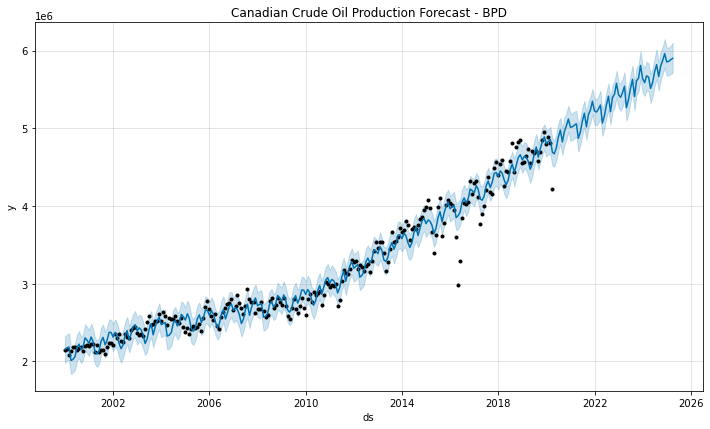

In [55]:
# Plot the graph of this data to get an understanding of how well forecast looks
model.plot(forecast);
plt.title("Canadian Crude Oil Production Forecast - BPD")
plt.show()

Next, we will check the model robustness using the best metrics for measuring accuracy of this model. Utilizing a combination of R-Squared, Mean Squared Error and Mean Absolute Error will help us to gauge the quality of our model. We will Python's Scikit-Learn library to quickly calculate these metrics.

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# calculate MAE between expected and predicted values for next 60 mont
y_true = df['y'].values
y_pred = forecast['yhat'][:244].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.2f' % mae)
r = r2_score(y_true, y_pred)
print('R-squared Score: %.2f' % r)

MAE: 94576.99
R-squared Score: 0.97


For the Canadian crude oil time-series data, the Prophet model gives an R-squared value of 0.97 i.e. 97% of variance in our data set is explained by the model. The MAE is calculated to be 94576 i.e. for each data point, the average magnitude error is roughly 94577 barrels, which isn't bad at all when we consider that our production value is in millions of barrels. 

Finally, we create a plot to compare actual vs. predicted values to give a clear understanding of how our model visually looks against the existing Canadian crude oil production dataset.

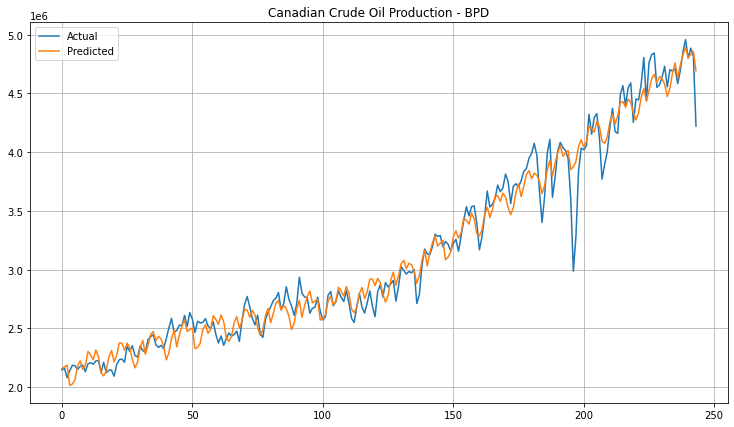

In [68]:
plt.figure(figsize=(12.5,7))
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Canadian Crude Oil Production - BPD")
plt.grid(True)
plt.legend()
plt.show()